## Run time

* Find min/max: $O(1)$
* Insert: $O(\log n)$
* Delete: $O(\log n)$

In [3]:
from __future__ import print_function
import numpy as np

from IPython.display import clear_output
from pjdiagram import *
from ipywidgets import *

from heap import binary_heap_allocation_example, insert_item_to_heap_example, percolate_down_example

# Description

A heap is a type of binary tree that allows fast insertion and fast traversal. This makes them a good candidate for sorting large amounts of data. Heaps have the following properties:
- the root node has maximum value key
- the key stored at a non-root is at most the value of its parent

Therefore:
- any path from the root node to a leaf node is in nonincreasing order

However:
- the left and right sub-trees don't have a formal relationship


## Storage

A binary tree can be represented using an array with the following indexing:

$$\texttt{parent}\left(i\right) = (i-1)/2$$
$$\texttt{left}\left(i\right) = (2i)+1$$
$$\texttt{right}\left(i\right) = (2i)+2$$

### Example
- root node index: $0$
    - left child: $1$
        - left child: $2*1+1 = 3$
        - right child: $2*1+2 = 4$
    - right child: $2$
        - left child: $2*2 + 1 = 5$
        - right child: $2*2 + 2 = 6$



The figure below provides a visual demonstration.

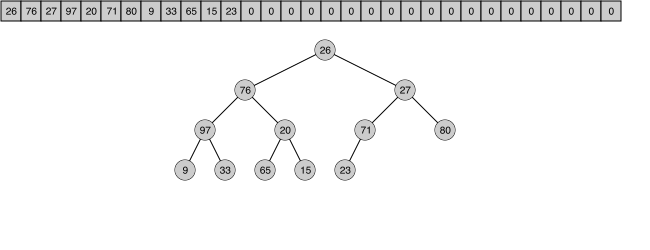

In [4]:
binary_heap_allocation_example()

# Operations

## Inserting a new item into the heap

To insert a new item into the heap, we start by first adding it to the end. Once added, we will percolate the item up until its parent is larger than the item.

In [5]:
def parent(i): return (i-1)/2
def left(i): return 2*i+1
def right(i): return 2*i+2

def percolate_up(heap, startpos, pos):
    ppos = parent(pos)
    while pos > startpos and heap[ppos] < heap[pos]:
        # percolate value up by swapping current position with parent position
        heap[pos], heap[ppos] = heap[ppos], heap[pos]
        
        # move up one node
        pos = ppos
        ppos = parent(pos)
        
def heap_insert(heap, value):
    # add value to end
    heap.append(value)
    
    # move value up heap until the nodes below it are smaller
    percolate_up(heap, 0, len(heap)-1)

To see why this works, we can visualize the algorithm. We start with a new value of `100` (highlighted with red). That is inserted into the bottom of the heap. We percoluate `100` up (each swap is highlighted) until it gets placed into the root note. Once finished, the heap's properties are now restored, and every child will have a smaller value than its parent.

To get a good sense of how `percolute_up` works, try putting different values in for the heap. Note that, it won't work correctly if the initial value isn't a proper heap.

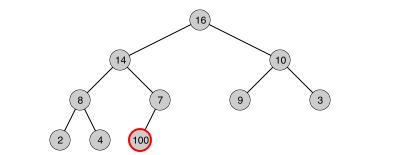

In [6]:
heap = [16, 14, 10, 8, 7, 9, 3, 2, 4]
heap.append(100)
insert_item_to_heap_example(heap)

A quick example of using the code:

adding 20:  [20]
adding 5:   [20, 5]
adding 1:   [20, 5, 1]
adding 50:  [50, 20, 1, 5]
adding 6:   [50, 20, 1, 5, 6]


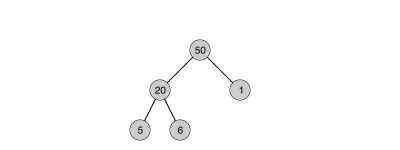

In [7]:
heap = []
heap_insert(heap, 20)
print("adding 20: ", heap) # [20]
heap_insert(heap, 5)
print("adding 5:  ", heap) # [5, 20]
heap_insert(heap, 1)
print("adding 1:  ", heap) # [1, 20, 5]
heap_insert(heap, 50)
print("adding 50: ", heap) # [1, 20, 5, 50]
heap_insert(heap, 6)
print("adding 6:  ", heap) # [1, 5, 6, 50, 20]

with Canvas(400, 150) as ctx:
    draw_binary_tree(ctx, (200, 50), heap)


## Removing an item from the heap

Removing the root node from the heap gives the largest value. In place of the root node, the smallest (i.e. last value in the heap) can be placed at the root, and the heap properties are then restored.

To restore the heap properties, the function `percolate_down` starts at the root node, and traverses down the tree. At every node it compares the current node's value with the left and right child. If the children are smaller than the current node, because of the heap properties, we know the rest of the tree is correctly ordered. If the current node is less than the left node or right node, it is swapped with the largest value.

To understand why this works, consider the two possibilities:

(1) The current node is largest. This meets the definition of a heap.

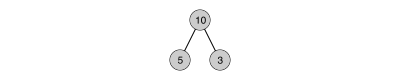

In [8]:
heap = [10, 5, 3]
with Canvas(400, 80) as ctx:
    draw_binary_tree(ctx, (200, 20), heap)

(2) The left child is largest. In the case if we swap the parent node with the child, the heap properties are restored (i.e. the top node is larger than either of its children).

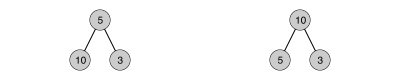

In [9]:
heap1 = [5, 10, 3]
heap2 = [10, 5, 3]
with Canvas(400, 80) as ctx:
    draw_binary_tree(ctx, (100, 20), heap1)
    draw_binary_tree(ctx, (300, 20), heap2)

We have to do this recursively down the tree, as every swap we make can potentially cause a violation of the heap below. The code for the algorithm is given below:

In [10]:
def percolate_down(heap, i, size):
    l = left(i)
    r = right(i)
    if l < size and heap[l] > heap[i]:
        max = l
    else:
        max = i
        
    if r < size and heap[r] > heap[l]:
        max = r
        
    # if left or right is greater than current index
    if max != i:
        # swap values
        heap[i], heap[max] = heap[max], heap[i]    
        
        # continue downward
        percolate_down(heap, max, len(heap))

To see this code in action, we'll start with a well-formed heap. Next, we'll take a value off of the heap by swapping the root node with the last node. Finally, we restore the heap with a call to `percolate_down`. In the demo below the highlighted nodes show the two nodes that will be swapped (i.e. parent node and the largest child).

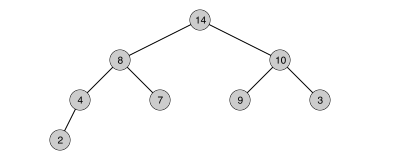

In [14]:
heap = [16, 14, 10, 8, 7, 9, 3, 2, 4]

# swap root with last value (4 is now root, and 16 is at the bottom)
heap[0], heap[-1] = heap[-1], heap[0]

# remove `16` from heap, and restore the heap properties
value = heap.pop()

percolate_down_example(heap)

Finally, putting everything together, we have `heap_pop`:

In [12]:
def heap_pop(heap):
    # swap root with last value
    heap[0], heap[-1] = heap[-1], heap[0]
    
    # remove last value
    result = heap.pop()
    
    # restore heap properties
    for i in range(len(heap)):
        percolate_down(heap, 0, len(heap))
    
    return result

To see `heap_pop` in action:

In [13]:
heap = []
heap_insert(heap, 1)
heap_insert(heap, 100)
heap_insert(heap, 20)
heap_insert(heap, 5)
heap_insert(heap, 3)
print(heap)

print(heap_pop(heap))
print(heap_pop(heap))
print(heap_pop(heap))
print(heap_pop(heap))
print(heap_pop(heap))

[100, 5, 20, 1, 3]
100
20
5
3
1
